# Deploy registered model
![Drag Racing](./Images/MLflow_deploy.png)

# Test served model

Assuming model is served and the url to access the serve model is 'http://mlflowserve:5000/invocations'. 

We construct a REST API call by using package requests of python to send the input X to retrieve the predicted y as follow

In this example:
- X must be an array which contains (n,input_steps,features)
- body data must be converted to json using json dumps with the fields 'inputs'

# Load test dataset

We have save the test dataset beforehand to the test_input.csv for ease of demo.

In practice, the dataset is streamed into the deployed model in real-time.

In [53]:
import pandas as pd

test_input = pd.read_csv('./test_input_rnn.csv',index_col=None)
test_label = pd.read_csv('./test_label_rnn.csv',index_col=None)

# Convert to the right dimension for input of model prediction
Since our model use 30 historical time steps with 3 features for prediction. The test data should have the dimension of (n, 30,3)

In [54]:
import numpy as np
n_features = 3
test_input_np = np.array(test_input)[:,1:]
test_input_np = test_input_np.reshape((test_input_np.shape[0],int(test_input_np.shape[1]/n_features),n_features))
print('test input shape:',test_input_np.shape)
test_input_list = test_input_np.tolist()
test_label_np = np.array(test_label)[:,1:]
test_label_np = test_label_np.reshape((test_label_np.shape[0],test_label_np.shape[1],1))
print('test label shape:',test_label_np.shape)

test input shape: (32, 30, 3)
test label shape: (32, 30, 1)


# Predictions

![Drag Racing](./Images/mlflow_test.png)

Call a POST request to the API server which contains the deployed model

The body contains the test dataset test_input_rnn.csv which is transformed into the right format for predictions.

In practice, a batch of streamed dataset is packed and transformed into the right format and sent via the POST request to the API server to obtain the real-time predictions. The value of the predictions will be updated to the timeseries chart.

In [55]:
import json
import requests

url = 'http://mlflowserve:5000/invocations'

headers = {'Content-Type': 'application/json'}
request_data = json.dumps({"inputs": test_input_list})
response = requests.post(url,request_data, headers=headers)

In [56]:
json_response = json.loads(response.content)
json_response['predictions']

[[[0.10428031533956528],
  [0.11798589676618576],
  [0.06530940532684326],
  [0.07976706326007843],
  [0.171655535697937],
  [0.11459740251302719],
  [-0.003434751182794571],
  [0.003547079861164093],
  [0.05507645010948181],
  [0.038119520992040634],
  [-0.038625795394182205],
  [-0.046825096011161804],
  [-0.004652932286262512],
  [0.1167483925819397],
  [0.1968640834093094],
  [0.10101620852947235],
  [0.2145320624113083],
  [0.1778331696987152],
  [0.1253797709941864],
  [0.2523219883441925],
  [0.2527754604816437],
  [0.25495609641075134],
  [0.22981023788452148],
  [0.09670831263065338],
  [0.032968051731586456],
  [-0.005472242832183838],
  [-0.03602297976613045],
  [-0.02544621005654335],
  [-0.044477589428424835],
  [-0.024919923394918442]],
 [[0.08330883085727692],
  [0.056404609233140945],
  [0.12173840403556824],
  [0.13873723149299622],
  [0.2008781135082245],
  [0.1793004870414734],
  [0.10245993733406067],
  [0.051908742636442184],
  [0.09417831897735596],
  [0.099240630

(32, 30, 1)


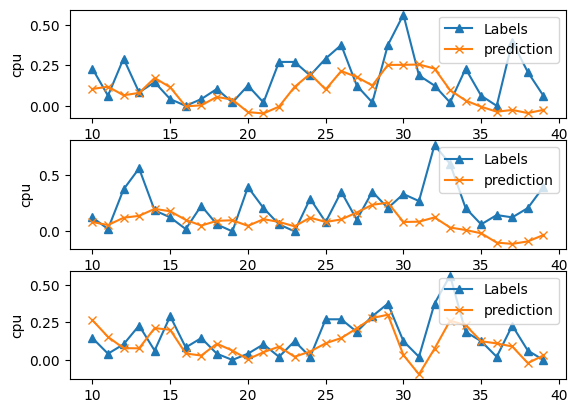

In [60]:
import matplotlib.pyplot as plt
max_subplots = 3
plot_col = 'cpu'
max_n = max_subplots
shift = 10
predictions = np.array(json_response['predictions'])
print(predictions.shape)
input_indices = np.arange(predictions.shape[1])
label_indices = np.arange(shift,predictions.shape[1]+shift,1)
for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col}')
#     plt.plot(input_indices, test_input_np[n, :, 0],
#              label='Inputs', marker='.', zorder=-10)
    plt.plot(label_indices, test_label_np[n, :, 0],
                marker='^', label='Labels')
    plt.plot(label_indices,  predictions[n, :, 0],
                label='prediction', marker='x')
    plt.legend()